# Estimating Covariance Structures
Last week, we saw that we can model repeated measures probabilistically by making using of the *multivariate* normal distribution. Key to this, was the specification of the variance-covariance matrix, which captures the pattern of correlation across the repeated measurements. We also saw that one of the problems with the repeated measures ANOVA was that it assumed a very restrictive covariance structure in the form of *compound symmetry* or, more generally, *sphericity*. This had direct consequences for inference because the covariance structure directly informs the standard errors and thus the denominator of the tests statistics and the $p$-values. So, much of our concern around repeated measures is correctly capturing the structure of the variance-covariance matrix. In an ideal world, what we want is a method that makes *no* assumptions about the covariance structure and just allows it to be estimated from the data. Unfortunately, this desire has consequences for inference. In short, the condition of compound symmetry is imposed for the repeated measures ANOVA *precisely* because that is the one situation where the results simplify back to classical form and inference still works. As soon as we move away from this to *any arbitrary covariance structure*, the inferential machinery *falls apart*. In this part of the lesson, our focus will be on understanding this situation because it has direct consequences for all the methods we will cover going forward. 

## The Basic Problem
Recall that we refer to the variance–covariance matrix as $\boldsymbol{\Sigma}$, as a direct analog of the single variance term $\sigma^{2}$ from the normal linear model. Conceptually, $\boldsymbol{\Sigma}$ plays the same role, describing the scale and structure of the noise in the data. From a mathematical point of view, the natural generalisation of everything we have done so far is therefore to replace $\sigma^{2}$ with $\boldsymbol{\Sigma}$ in the expressions derived for the normal linear model. When $\boldsymbol{\Sigma}$ is known, this causes no fundamental difficulties. $\boldsymbol{\Sigma}$ behaves like a constant object, introducing no additional randomness, and the underlying theory remains intact. In this sense, moving from a single variance to a full covariance matrix does not, by itself, create any new problems. As we will see later, a known $\boldsymbol{\Sigma}$ can be used to *remove* the correlation structure from the data, allowing us to work in a world that is mathematically indistinguishable from the independent case.

However, the reality is that we will *almost never* know $\boldsymbol{\Sigma}$. As such, we will almost always be in a position where we need to *estimate* it from the data. Once we do that, the term $\boldsymbol{\Sigma}$ is no longer a *fixed constant*. Instead, we have $\hat{\boldsymbol{\Sigma}}$, which is a *random variable*. This introduces an additional layer of uncertainty that causes some major issues. We will discuss the full story below, but the short version is that treating $\hat{\boldsymbol{\Sigma}}$ as an *estimate* means we no longer know how the standard errors are distributed, which means we do not know what null distribution the test statistics have and cannot calculate a $p$-value. In short, *all our inferential machinery breaks*.

## How Estimating $\boldsymbol{\Sigma}$ Breaks Inference

### Revisiting the Normal Linear Model
To understand why the classical inferential machinery breaks, we need to go back to some of the information covered last semester on [statistical inference](https://pchn63101-advanced-data-skills.github.io/Inference-Linear-Model/2.estimation-uncertainty.html). Focusing on the normal linear model, if we know $\sigma^{2}$ then the standard errors of the parameter estimates are a *constant* quantity. Remember, if the assumptions of the model are met, then the parameter estimates have a known distribution. For example, a single slope from a typical regression model has the distribution

$$
\hat{\beta}_{1} \sim \mathcal{N}\left(\beta_{1}, \frac{\sigma^{2}}{\sum{(x_{i} - \bar{x})^{2}}}\right).
$$

Its standard error is then just the square-root of this variance term, which depends upon knowing $x$ (which we always do) and $\sigma^{2}$. This becomes important when we form a test statistic and want to know its null distribution. In the case where $\sigma^{2}$ is a *constant* then the standard error is *also constant*. This means that if we calculate 

$$
z = \frac{\hat{\beta}_{1}}{\sqrt{\text{Var}\left(\hat{\beta}_{1}\right)}},
$$

we are just dividing a random variable by a constant. This does not change its distribution, only its *scale*. So, under the null hypothesis that $\beta_{1} = 0$, the null distribution of $z$ is 

$$
z \sim \mathcal{N}(0,1).
$$

This is exactly how inference was conducted until Student came along, with statisticians effectively treating the variance *as if it were known*. So, what happens in the more *realistic* scenario when $\sigma^{2}$ is *not* known, and must be replaced by its estimate $\hat{\sigma}^{2}$? Well, the main change is that the *standard errors* also become *estimates*

$$
\widehat{\text{SE}}\left(\hat{\beta}_{1}\right) = \sqrt{\frac{\hat{\sigma}^{2}}{\sum{(x_{i} - \bar{x})^{2}}}}, 
$$

which means that our test statistic is no longer a simple *scaling* of $\hat{\beta}_{1}$. Instead, it now has the form

$$
t = \frac{\hat{\beta}_{1}}{\widehat{\text{SE}}\left(\hat{\beta}_{1}\right)}.
$$

This is a ratio between *two* random variables. Plugging an *estimate* of the standard error in adds an additional layer of uncertainty here, which needs to be accommodated in order to derive the null distribution. With each new sample, the scaling in the *denominator* will change. As such, we need to know the *distribution* of the estimate $\hat{\sigma}^{2}$. We glossed-over this last semester, but under the normal linear model the estimate of the variance has the following sampling distribution

$$
\hat{\sigma}^{2} \sim \frac{\sigma^{2}}{\nu}\chi^{2}(\nu)
$$

This is a scaled $\chi^{2}$ distribution with $\nu$ degrees of freedom, which is probably unfamiliar to you. However, understanding this distribution is *crucial* for understanding (1) where the $t$-distribution comes from, (2) where the concept of *degree of freedom* come from, (3) how degrees of freedom function as a method of capturing uncertainty in our estimate of $\sigma^{2}$ and (4) why everything collapses once we move from a single variance term to an arbitrary covariance matrix. Because of this, we will stick to this topic for a little bit longer before getting back to the point of this section. 

### Understanding the Scaled $\chi^{2}$ Distribution
To understand the scaled $\chi^{2}$ distribution, we need to first note that a $\chi^{2}$ distribution has only a single parameter, *the degrees of freedom*, that controls its *width*. This width directly captures the *uncertainty* in the distribution and thus the *uncertainty* around our estimate of $\sigma^{2}$. However, because the distribution is only parameterised by *one number*, this means that both its *mean* and its *variance* are derived from that one number. The variance is simply ... This means that we can get the *shape* correct by using a suitable value for the degrees of freedom. However, we cannot also get the *scale* correct. So, $\chi^{2}(5)$ may well have the right *width* to capture the uncertainty in the variance estimate, but the expected value is then $\nu = 5$, which would only work when $\sigma^{2} = 5$ and no other time. So, to make this actually useable, we need to *scale* it into the correct units. If we were to multiply this whole distribution by $\sigma^{2}$, then the expected value would be $\sigma^{2} \times \nu$, which is obviously $\nu$-times too big. So if we first *divide* $\sigma^{2}$ by $\nu$, then the expected value becomes $\frac{\sigma^{2}}{\nu} \times \nu = \sigma^{2}$. We then get a distribution with the correct *width* (encoded by the *degrees of freedom*) and the correct *units* (formed by scaling the distribution by $\sigma^{2}/\nu$). So, the scaling term is a bit of a distraction. The real key element here is that *the degrees of freedom are a direct measure of our uncertainty in the estimate of $\sigma^{2}$*.

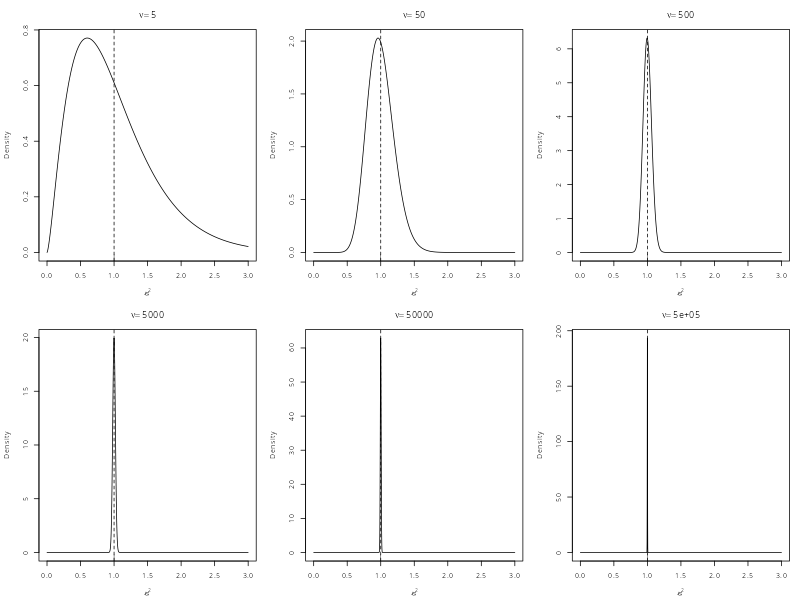

In [17]:
# Visualise the scaled chi-square variance estimator:
#   s2_hat = (sigma2 / nu) * X,  where X ~ chisq(nu)
# so s2_hat is centred on sigma2 and collapses onto sigma2 as nu grows.

sigma2 <- 1
dfs <- c(5, 50, 500, 5000, 50000, 500000)

# Density of s2_hat via change-of-variables:
# If S = (sigma2/nu) X, then f_S(s) = (nu/sigma2) * f_X((nu/sigma2)*s)
d_scaled_chisq <- function(s, nu, sigma2) {
  (nu / sigma2) * dchisq((nu / sigma2) * s, df = nu)
}

# Choose an x-range that makes the "collapse" obvious
x <- seq(0, 3, length.out = 2000)

# Pre-compute a common y-limit so all plots are comparable
ymax <- max(sapply(dfs, function(nu) max(d_scaled_chisq(x, nu, sigma2))))

op <- par(mfrow = c(2,3), mar = c(4, 4, 3, 1) + 0.1)
on.exit(par(op), add = TRUE)

for (nu in dfs) {
  y <- d_scaled_chisq(x, nu, sigma2)

  plot(x, y, type = "l",
       xlab = expression(hat(sigma)^2),
       ylab = "Density",
       xlim = c(0,3),
       main = bquote(nu == .(nu)))
  #     main = bquote(frac(sigma^2,nu) * chi^2 * "(" * nu * ")"))

  abline(v = sigma2, lty = 2)          # true variance
  rug(c(sigma2), ticksize = 0.03)
  #legend("topright",
  #       legend = c(bquote(nu == .(nu)), bquote(sigma^2 == .(sigma2))),
  #       bty = "n")
}

# If you want to *really* see the collapse for large nu, try narrowing xlim:
# e.g., set x <- seq(0.6, 1.4, length.out=2000) and xlim=c(0.6,1.4)


So notice what happens. As our sample size goes up, the degrees of freedom *also* go up. In the world of the scaled $\chi^{2}$ distribution, this makes the width of the distribution *shrink*. So, when the same size is *small* there is a lot of uncertainty around the true value of $\sigma^{2}$. When the sample size gets *large*, this uncertainty gets smaller and smaller until it effectively *vanishes*. SO, the degrees of freedom have a *direct* role in parameterising this distribution and quantifying our uncertainty about $\hat{\sigma}^{2}$ by controlling this width. Once they get larger enough, the distribution is effectively a single point sat on the true variance. At this point, we *know* $\sigma^{2}$, for all practical purposes. This is where $\hat{\sigma}^{2} = \sigma^{2}$, the $t$-distribution becomes the standard normal distribution, the degrees of freedom can be taken as *infinite* and therefore *disappear*, because they are no longer needed as a method of quantifying this uncertainty. 

Importantly, knowing this distribution means we can show that $E(\hat{\sigma}^{2}) = \sigma^{2}$ and thus the variance estimate (and by extension the standard error estimate) is *unbiased*. This means we can trust these calculations as estimates of the true population values. The other thing to notice here is that this distribution is *where degrees of freedom come from*. The reason degrees of freedom exist is because they appear as a parameter that governs the *width* of this sampling distribution. Thus, degrees of freedom directly encode uncertainty around the true value of $\sigma^{2}$. As the sample size goes up, the degrees of freedom go up and the $\chi^{2}$ gets *narrower* until it collapses into a single point centred on $\sigma^{2}$. Because the standard error of the parameter estimate depends upon the estimate of $\sigma^{2}$, the scaled $\chi^{2}$ distribution passes this uncertainty on to the $t$-distribution. As such, the $t$-distribution is similarly parameterised by the degrees of freedom. The point where the $\chi^{2}$ collapses to a single point is *exactly* when the $t$-distribution and the standard normal become *the same*. At that point, uncertainty is effectively 0 and the degrees of freedom are no longer important. This why most of these problems disappear once we have *a large sample size*. 



 the uncertainty that comes from estimating $\sigma^{2}$ affects inference via the *denominator* of the test statistic. If we *know* $\sigma^{2}$, then our test statistic is a $z$-statistic and is distributed as $z \sim \mathcal{N}(0,1)$. However, when $\sigma^{2}$ is *estimated*, the test statistic is a $t$-statistic and is distributed as $t \sim \mathcal{T}(\nu)$. Here, $\nu$ is the *degrees of freedom*, which characterises the *uncertainty* in the estimate of $\sigma^{2}$. This is what controls the *width* of the $t$-distribution, which will approach the standard normal as the sample size increases. In other words, we can think of the degrees of freedom as "the amount to which the null distribution deviates from a standard normal due to uncertainty in the estimation of $\sigma^{2}$". So the degrees of freedom are *key*.

To understand why the classical inferential machinery breaks, we need to go back to some of the information covered last semester on [statistical inference](https://pchn63101-advanced-data-skills.github.io/Inference-Linear-Model/2.estimation-uncertainty.html). Recall that, in the normal linear model, the uncertainty that comes from estimating $\sigma^{2}$ affects inference via the *denominator* of the test statistic. If we *know* $\sigma^{2}$, then our test statistic is a $z$-statistic and is distributed as $z \sim \mathcal{N}(0,1)$. However, when $\sigma^{2}$ is *estimated*, the test statistic is a $t$-statistic and is distributed as $t \sim \mathcal{T}(\nu)$. Here, $\nu$ is the *degrees of freedom*, which characterises the *uncertainty* in the estimate of $\sigma^{2}$. This is what controls the *width* of the $t$-distribution, which will approach the standard normal as the sample size increases. In other words, we can think of the degrees of freedom as "the amount to which the null distribution deviates from a standard normal due to uncertainty in the estimation of $\sigma^{2}$". So the degrees of freedom are *key*.

Now, the whole reason the $t$-distribution exists is because it can be derived from the structure of the test statistic. Because both the numerator and denominator are *estimates*, they are both random variables with a given sampling distribution. In order to work out the distribution of their ratio, *both* sampling distributions need to be derived. Last semester, we showed that the distribution of the parameter estimates was a known quantity. For a single slope from a typical regression model, we have

$$
\hat{\beta}_{1} \sim \mathcal{N}\left(\beta_{1}, \frac{\sigma^{2}}{\sum{(x_{i} - \bar{x})^{2}}}\right).
$$

Importantly, the variance of this distribution depends upon knowing $\sigma^{2}$, which we do not. If we replace this with an *estimate*, $\hat{\sigma}^{2}$, we introduce another layer of uncertainty. In order to characterise this addition layer, we need to know the distribution of $\hat{\sigma}^{2}$. We glossed-over this last semester, but under the normal linear model this estimate has the following sampling distribution

$$
\hat{\sigma}^{2} \sim \frac{\sigma^{2}}{\nu}\chi^{2}(\nu)
$$

This is a $\chi^{2}$ distribution with $\nu$ degrees of freedom that is scaled into the same units as the variance. Importantly, knowing this distribution means we can show that $E(\hat{\sigma}^{2}) = \sigma^{2}$ and thus the variance estimate (and by extension the standard error estimate) is *unbiased*. This means we can trust these calculations as estimates of the true population values. The other thing to notice here is that this distribution is *where degrees of freedom come from*. The reason degrees of freedom exist is because they appear as a parameter that governs the *width* of this sampling distribution. Thus, degrees of freedom directly encode uncertainty around the true value of $\sigma^{2}$. As the sample size goes up, the degrees of freedom go up and the $\chi^{2}$ gets *narrower* until it collapses into a single point centred on $\sigma^{2}$. Because the standard error of the parameter estimate depends upon the estimate of $\sigma^{2}$, the scaled $\chi^{2}$ distribution passes this uncertainty on to the $t$-distribution. As such, the $t$-distribution is similarly parameterised by the degrees of freedom. The point where the $\chi^{2}$ collapses to a single point is *exactly* when the $t$-distribution and the standard normal become *the same*. At that point, uncertainty is effectively 0 and the degrees of freedom are no longer important. This why most of these problems disappear once we have *a large sample size*. 


### What Happens When We Use $\hat{\boldsymbol{\Sigma}}$?
Now, what happens to the standard error when $\sigma^{2}$ is no longer *a single number* and is instead a complex function of different elements of an unstructured variance-covariance matrix? Well, the clean algebra disappears and the distribution can no longer be derived analytically. It ceases to be a consistent object across all models and, in effect, becomes *unknowable*. This means that the scaled $\chi^{2}$ distribution disappears and, along with it, the concept of degrees of freedom. If we divide our parameter estimate by its estimated standard error it is no longer the ratio of two random variables with known distributions. It is the ratio of a random variable with a known distribution and a random variable *with no known distribution*. This makes the null distribution of this test statistic *also unknown*. And without a known null, there is no way to calculate a $p$-value. Without a known distribution, we also do not know *how* biased the standard error estimates are and we cannot calculate an accurate confidence interval. In short, *we are stuck*.

## Practical Solutions to this Problem

So, we find ourselves in a difficult spot. What we *want* is a framework where we can have any form of covariance structure to accurately represent the data-generating process. This would allow us to model any type of repeated measures experiment, irrespective of its complexity. However, the inferential devices used by the normal linear model simply *do not allow this*. The emphasis on *knowing* the distribution of the estimates in order to calculate $p$-values and confidence intervals has backed us into a corner. Once the very specific conditions that allow these to be calculated are gone, so is the whole exact inferential machinery. This does demonstrate how *fragile* these methods really are. 

In terms of applying methods like FGLS in practice, there are generally 4 approaches we can use: ignore the problem, invent degrees of freedom, use results that do not need degrees of freedom, or simulate the null distributions from the model. We will discuss all these below and then see how they are applied across different packages for FGLS results in `R`. Remember though, this is a *general problem* that we will see appear again when we get to mixed-effects. Do not make the mistake of thinking this is GLS-specific or that mixed-effects will solve it.

### 1. Ignore the Problem
Our first option is to *ignore* the problem. If we treat our estimate as *exactly* the population value, then we can carry on without any issues. So, if we take $\hat{\boldsymbol{\Sigma}} = \boldsymbol{\Sigma}$ then there are no problems any more. In the context of GLS, this means we can remove the covariance structure *perfectly* and the whole problem reduces back to a regular regression model with $i.i.d.$ errors. So, we simply act as if we knew $\boldsymbol{\Sigma}$ all along.

Although this is *practically* appealing, because all the mess indicated above disappears, it comes with some consequences:

- The extra uncertainty from estimating $\boldsymbol{\Sigma}$ is simply ignored. This means the model contains no penalty for estimating all the variance and covariance parameters.
- This means that standard errors may be too small, test statistics too large and $p$-values overly-optimistic, especially in small samples.
- We are pretending that degrees of freedom exist, but they technically do not. Furthermore, because we are pretending that we got $\boldsymbol{\Sigma}$ for free, the degrees of freedom have no correction for estimating $\boldsymbol{\Sigma}$. As such, they will be *larger* than equivalent repeated measures ANOVA models.

### 2. Calculate *Effective* Degrees of Freedom
Our second option is to accept that $\hat{\boldsymbol{\Sigma}}$ is an estimate and accept that we need to accommodate this uncertainty somehow. In order to do this, we can create *fictitious* degrees of freedom to allow a $p$-value to be calculated. So, although we fully accept that degrees of freedom no longer exist, what we can do is *find* a null distribution that matches our model and then use the degrees of freedom from that distribution. For instance, we can use a combination of heuristics and information in the model to approximate the *variance* of the calculated test statistic. If we know that the variance of the $t$-distribution is $\frac{\nu}{\nu - 2}$, then we can use our approximated variance to solve for $\nu$. This gives us a $t$-distribution with approximately the *correct width* for our calculated test statistic. These fictitious degrees of freedom are known as *effective* degrees of freedom.

This method is perhaps more appealing than simply pretending there is no problem because it tried to accommodate small sample adjustments and uncertainty, though it also comes with some consequences:

- We are assuming that the true null distribution only differs from known null distributions (such as the $t$ and $F$) by its width, but not the general shape.
- This still remains an *approximation*, though it should behave better in smaller samples when degrees of freedom become more necessary.
- Degrees of freedom can become fractional and no longer have a clear theoretical grounding. They are more devices to encode "tail-heaviness" within the familiar language of $t$ and $F$ distributions. 

In fact, we already saw an example of this last week in terms of the *non-sphericity corrections*.

### 3. Produce Results that are *Asymptotically* Correct
Our third option is to side-step degrees of freedom entirely. Recall from the normal linear model that the uncertainty that comes from estimating $\sigma^{2}$ effectively *disappears* once the same size is large enough. This is because $\hat{\sigma}^{2} = \sigma^{2}$, for all practical purposes. Thus, we can treat everything as if $\sigma^{2}$ is known, because our uncertainty is effectively 0. We saw this in the shape of the $t$-distribution. Once the sample size is big enough, the $t$-distribution *becomes* a standard normal distribution whose width is fixed, rather than adaptive. When this happens, the degrees of freedom disappear. So, whilst we normally work with something like

$$
\frac{\hat{\beta}_{1}}{\text{SE}(\hat{\beta}_{1})} \sim \mathcal{T}(\nu),
$$

it is not wrong to work with

$$
\frac{\hat{\beta}_{1}}{\text{SE}(\hat{\beta}_{1})} \sim \mathcal{N}(0,1).
$$

The only caveat is that the sample size needs to be *big enough* for the second option to be accurate. However, notice that this second option *does not need degrees of freedom*. We say that this test is *asymptotically correct*, meaning it gets more accurate as $n \rightarrow \infty$. All we need to do is make the assumption that we have enough data so that we can effectively treat our estimate of $\sigma^{2}$ as the *true value*. At that point it becomes a *constant*. So, there is no uncertainty to deal with, no sampling distribution to know, no concept of degrees of freedom and all the messiness disappears.

Although such asymptotic approaches are not necessary with the normal linear model, once we are in the realm of estimating a complex covariance structure this approach becomes more appealing. There is a *statistical purity* to this result because we do not need to pretend degrees of freedom still exist nor invent fictitious degrees of freedom based on the model. However, there are some clear issues here

- We need to be comfortable assuming that our $n$ is *large-enough* for this to work, but this is an *unanswerable* question (see box below).
- We need to be comfortable with the idea of dismissing uncertainty in the estimation of $\boldsymbol{\Sigma}$ as negligible.
- In small samples this will result in inference that is *optimistic*, though the open use of asymptotic tests already embeds this as a caution.

`````{admonition} How Large is "Large"?
:class: tip
If we want to lean on asymptotic theory, the obvious question is "how big does $n$ need to be?". The problem is that the definition is based on a *limit*, so it says that the approximation gets better and better as $n$ moves towards infinity. For our purpose, $n$ is the *number of subjects*, rather than the total amount of data. So, the answer is not that there is some magic sample size that is suddenly large enough, the answer is that the approximation will get better the larger $n$ becomes. The question then is more about what our tolerance for error is. The point of the asymptotic theory is to say that the error that comes from estimation becomes more negligible as $n$ grows, as does the penalty for estimating $\boldsymbol{\Sigma}$ from the data. So, unfortunately, there is *no honest numeric answer to this question*. The way to think about it is as a *degree of comfort*. If you are using FGLS with $n = 5$, you should feel *very uncomfortable*. If you are using $n = 50$, you should probably feel *cautious* and if you have $n > 200$ you should probably be feeling *reasonably comfortable*. As $n$ increases beyond that, you should probable feel perfectly fine about this approach. These are only ballpark figures, but the point is really to think of $n$ as a *continuum of comfort*, rather than as a *threshold*. 
`````

#### 4. Simulate the Null
As a final option, we can leave the world of trying to derive precise results mathematically and instead use the power of the *computer* to find a solution. This gets us into the world of *resampling methods*, which we encountered briefly last semester in the form of the *permutation test*, used when the errors are not normally distributed. For the general problem of deriving a null distribution under an arbitrary covariance structure, the *parametric bootstrap* is most commonly employed. In this method we:

1. Treat a fitted null model as the "truth".
2. Use this fitted model to simulate new data.
3. Refit the model to the simulated dataset and save a copy of the test statistic.
4. Over many repeats of 2 and 3, build up a *distribution* of the test statistic under the null.
5. Calculate the $p$-value and confidence intervals from this distribution.

So this requires *zero* theory about the distribution of anything. The uncertainty comes through naturally as part of the simulation and we can get a $p$-value irrespective of the form of $\boldsymbol{\Sigma}$. So this has some distinct advantages because we can get rid of much of the difficult approximation needed in classical approaches. However, the tradeoffs are

- Computational burden, as calculating a single $p$-value can be a long process depending upon the complexity of refitting the model 1,000 times or more.
- Fundamentally, we have to assume that our models is a close approximation to the truth for this to work. This can be seen as quite a *strong* assumption.

## Covariance Constraints
As well as understanding that the very process of estimating $\boldsymbol{\Sigma}$ causes problems, we also need to understand that we cannot have free reign to estimate any old covariance structure we like. One of the most important elements to recognise is that some sort of *constraint* is always needed when estimating a variance-covariance matrix. To see this, note that for a repeated measures experiment there are $nt \times nt$ values in this matrix. The values above and below the diagonal are a mirror image, so the true number of unknown values is $\frac{nt(nt + 1)}{2}$. For instance, if we had $n = 5$ subjects and $t = 3$ repeated measures, there would be $\frac{15 \times 16}{2} = 120$ unique values in the variance-covariance matrix. If we allowed it to be completely unstructured, we would have 120 values to estimate *just* for the covariance structure. Indeed, this is not really possible unless the amount of data we have *exceeds* the number of parameters. So, the data itself imposes a *constraint* on how unstructured the covariance matrix can be.

Luckily, for most applications, we not only assume that $\boldsymbol{\Sigma}$ has a block-diagonal structure (so most off-diagonal entries are 0), but that many of the off-diagonal elements are actually *identical*. We saw this previously with the repeated measures ANOVA. Even though $\boldsymbol{\Sigma}$ may have *hundreds* of values we *could* fill-in, if we assume compound symmetry only within each subject, there are only *two* covariance parameters to be estimated: $\sigma^{2}_{b}$ and $\sigma^{2}_{w}$. The whole matrix can then be constructed using those two alone. This is an example of *extreme simplification*, but it does highlight that we generally do not estimate the *whole* variance-covariance matrix. We only estimate *small parts* of it. Indeed, making the covariance matrix more general is often a risky move because of the number of additional parameters needed. The more we estimate from the same data, the greater our uncertainty will become because each element of the covariance-matrix is supported by *less data*. Complexity always comes at a price.

`````{admonition} Where Does This All Leave Us?
:class: warning
So, where do these problems leave us in terms of leaving the world of very stringent covariance assumptions?

... Ultimately, from the pure perspective of a *model* that capture the *data-generating process*, FGLS is an attractive proposition ... Unfortunately, the problems arrive as soon as we get to *inference* due to the fragility of the classic approaches to this problem. However, the reality is that as soon as we leave the world of the normal linear model, we leave the world of precise results and always end up in a world of approximations. This is not just a FGLS problem, this is a *global* problem. So if we ever want to use something more complicated than the normal linear model, we have to accept that precise inference breaks-down and we have to approximate it. The fundamental question simply becomes how *best* to approximate it so we can still reach useful conclusions from our models.
`````

[^weights-foot]: This is why the argument in `gls()` was `weights=`.

[^corfunc-foot]: You can look up descriptions of all of these using `?corClasses` at the prompt. 

[^white-foot]: This is sometimes known as *whitening* the data. This is a term you may come across in the neuroimaging literature, particularly in relation to how fMRI is analysed.

[^emmeans-foot]: The `mode=` option has been set to `df.error` so that the reported test matches the table from `summary()`. `emmeans` actually has some better ways of adjusting the degrees of freedom to accommodate the uncertainty in estimating $\boldsymbol{\Sigma}$, but this is a complication we will leave to one side for now.